In [182]:
import numpy as np
import pandas as pd
import pprint as pp

import matplotlib.pyplot as plt
%matplotlib inline

# to use seaborn styling in matplotlib plots
import seaborn as sns
sns.set()

# to display offline interactive plots
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# cufflines binds plotly to pandas DFs
import cufflinks as cf
import plotly.tools as tls

# to scale heatmaps
from sklearn import preprocessing

tls.embed('https://plot.ly/~cufflinks/8')
cf.set_config_file(offline=True, world_readable=False, theme='ggplot')

# Helper Functions

## Normalization

In [183]:
# Create x, where x the 'scores' column's values as floats
#x = df[['score']].values.astype(float)

# Create a minimum and maximum processor object
#min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
#x_scaled = min_max_scaler.fit_transform(x)

# Plotting

In [184]:
# distributions

# set style for showing outliers
flierprops = dict(marker='o', markersize=5, alpha=0.2)

def make_regional_boxplot(co2_df):
    co2_df.boxplot(by='sub-region', flierprops = flierprops, rot=45)
    plt.title(co2_df['region'].unique())
    plt.show();

In [185]:
# plotly
# cut df by column levels

def cut_column(df, col):
    level = pd.cut(df[col], 4, \
                   include_lowest = True, \
                   labels = ['1 low %s' % col, '2 med %s' % col, '3 high %s' % col, '4 very high %s' % col])
    df[col + '_level'] = level
    return df.copy()

# generic bubble plot

def plot_bubble(df, col):
    df.iplot(kind='bubble', x=x, y=y, size=size, text='country',\
           xTitle=str.title(x), yTitle=y, categories='region', \
             title= str.capitalize('%s vs %s for %s' % (x, y, q)))

def plot_bubble_with_cuts(df, col):
    df = cut_column(df.copy(), col)
    df.iplot(kind='bubble', x=x, y=y, size='population', text='country',\
           xTitle=str.title(x), yTitle=y, categories= col + '_level', logx=True, \
             title= str.title('%s vs %s for %s' % (x, y, q)))

# Load Data

In [186]:
mypath = 'data/final/'

filename = 'final_df.csv'
df = pd.read_csv(mypath + filename)

# assign name attribute to df
df.name = filename.split('_')[0]
df.head()

country region     sub-region  year   CO2_pc  energy_use_pc  hdi  \
0  afghanistan   Asia  Southern Asia  1949  0.00182            NaN  NaN   
1  afghanistan   Asia  Southern Asia  1950  0.01088            NaN  NaN   
2  afghanistan   Asia  Southern Asia  1951  0.01169            NaN  NaN   
3  afghanistan   Asia  Southern Asia  1952  0.01155            NaN  NaN   
4  afghanistan   Asia  Southern Asia  1953  0.01323            NaN  NaN   

   income_pc  motor_vehicles_per_1000  population  roads_paved_%  \
0     1030.0                      NaN         NaN            NaN   
1     1040.0                      NaN   7752118.0            NaN   
2     1060.0                      NaN   7839426.0            NaN   
3     1070.0                      NaN   7934798.0            NaN   
4     1120.0                      NaN   8038312.0            NaN   

   sulfur_emissions_pc_kg  surviving_kids_per_woman  
0                  0.0477                       NaN  
1                  0.0758                      2.89  
2                  0.0932                      2.89  
3                  0.1100                      3.02  
4                  0.1260                      3.02

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17055 entries, 0 to 17054
Data columns (total 13 columns):
country                     17055 non-null object
region                      16672 non-null object
sub-region                  16672 non-null object
year                        17055 non-null int64
CO2_pc                      17055 non-null float64
energy_use_pc               5324 non-null float64
hdi                         3898 non-null float64
income_pc                   14969 non-null float64
motor_vehicles_per_1000     456 non-null float64
population                  12517 non-null float64
roads_paved_%               1977 non-null float64
sulfur_emissions_pc_kg      11230 non-null float64
surviving_kids_per_woman    13919 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.7+ MB


In [143]:
# convert year to str
#df['year']=df['year'].astype('str')

In [188]:
# for now, just focus on CO2 values
val = 'CO2_pc'
co2_df = df.iloc[:,:5]
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17055 entries, 0 to 17054
Data columns (total 5 columns):
country       17055 non-null object
region        16672 non-null object
sub-region    16672 non-null object
year          17055 non-null int64
CO2_pc        17055 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 666.3+ KB


## Where are the highest & lowest CO2 emissions?

In [189]:
# global max
end_yr = str(co2_df['year'].max())
q = 'year == @end_yr'

co2_df[['country', 'year', val]].loc[co2_df.query(q)[val].idxmax()]

country      qatar
year          2013
CO2_pc     40.4587
Name: 12154, dtype: object

In [157]:
# top 10 co2 emitters
co2_df.query(q)[['country',val, 'sub-region']].sort_values(val, ascending=False).head(10)

country    CO2_pc          sub-region
12154                 Qatar  40.45868        Western Asia
15241   Trinidad And Tobago  34.51710                 NaN
3729                Cura Ao  34.05183                 NaN
8443                 Kuwait  27.25649        Western Asia
1109                Bahrain  23.68042        Western Asia
2097                 Brunei  18.91702  South-Eastern Asia
15662  United Arab Emirates  18.70654        Western Asia
8875             Luxembourg  18.64675      Western Europe
5073   Falkland Is Malvinas  18.06240                 NaN
12795          Saudi Arabia  17.92586        Western Asia

In [158]:
# regional max
co2_df.query(q).groupby('region').max()[val].sort_values()

region
Africa       8.82115
Oceania     16.23827
Americas    16.35165
Europe      18.64675
Asia        40.45868
Name: CO2_pc, dtype: float64

In [148]:
# global min
co2_df[['country', 'year', val]].loc[co2_df.query(q)[val].idxmin()]

country    Burundi
year          2013
CO2_pc     0.02803
Name: 2340, dtype: object

In [149]:
# regional min
co2_df.query(q).groupby('region').min()[val].sort_values()

region
Africa      0.02803
Americas    0.23059
Asia        0.23356
Oceania     0.35314
Europe      1.22141
Name: CO2_pc, dtype: float64

# Explore data

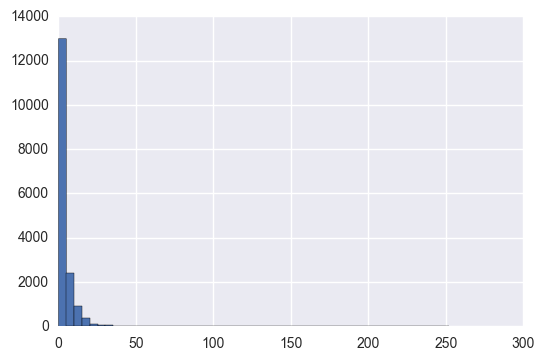

In [159]:
co2_df[val].hist(bins=50); 

This is not very useful. Also, since CO2 data can go back to the 1700s, it's not all that relevant. Let's reduce the timeframe.

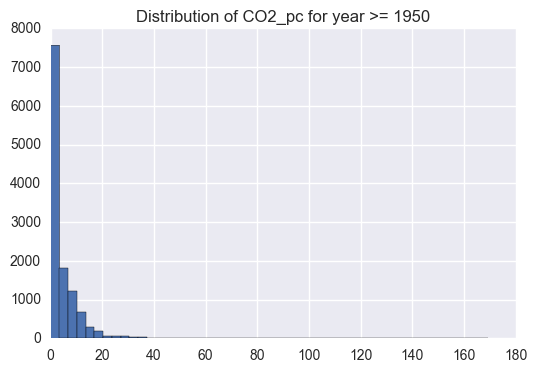

In [161]:
# CO2 dist since 1950

q = "year >= 1950"

co2_df.query(q)[val].hist(bins=50)
plt.title('Distribution of %s for %s' % (val, q)); 

Interestingly, the range of CO2 emissions has decreased. I suspect this is because coal is no longer a main fuel source. Something to dig into later.

## How does this distribution vary by region?

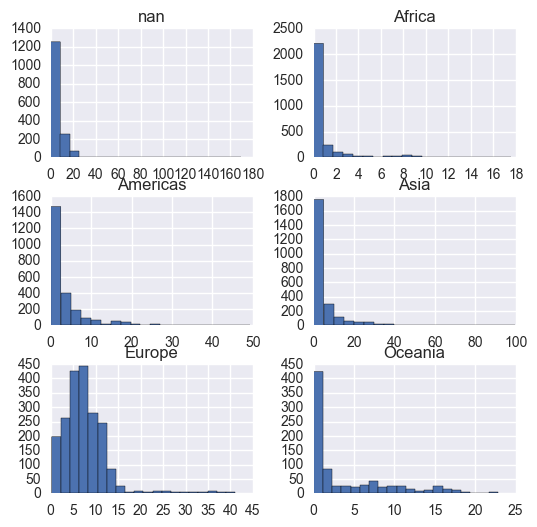

In [162]:
# dist by region

co2_df.query(q).sort_values('region').set_index(['region', 'sub-region','country','year']).\
unstack(level=(0))[val].hist( figsize=(6,6), bins=20);

### Observations

*Europe has the only normal-ish distribution* 

All regions have very negative-skew data, except for Europe which is closer to a normal distribution (albeit one with a long tail). Asia seems to have the longest tail.

*What about outliers?* 
I can barely make out the long tails in these histograms. Boxplots will highlight where there are outliers.

## How many outliers for each region?

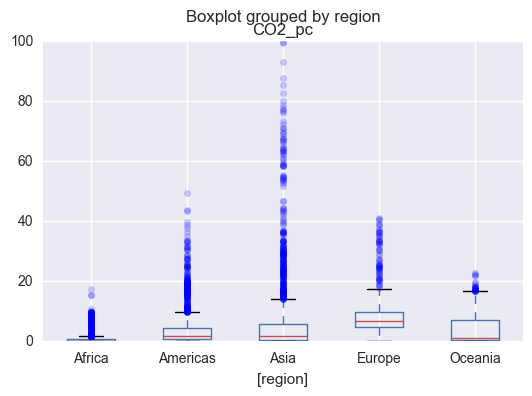

In [153]:


# reshape so region, sub_region & CO2 are columns
co2_df_box = co2_df.query(q).sort_values(['region', 'sub-region']).\
set_index(['region', 'sub-region','country','year'])[val].reset_index(level=(0,1))
                                                                        
co2_df_box.boxplot(by='region', flierprops = flierprops);

#### Observations

*Asia does indeed have a lot of extreme outliers*

So which sub-regions are represented by these outliers? Are the outliers spread equally among sub-regions?

### Where are the outliers within each region?

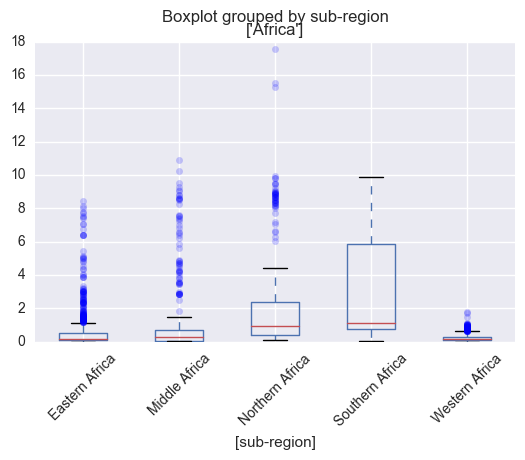

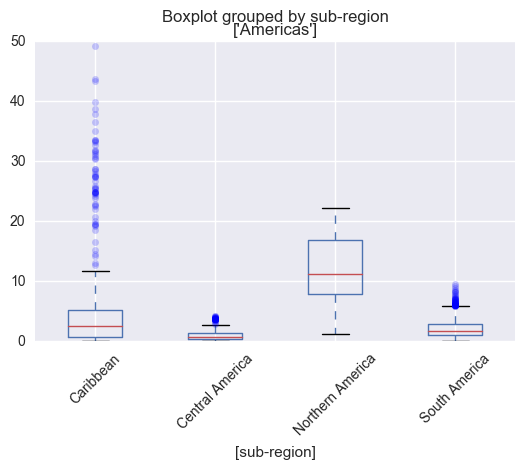

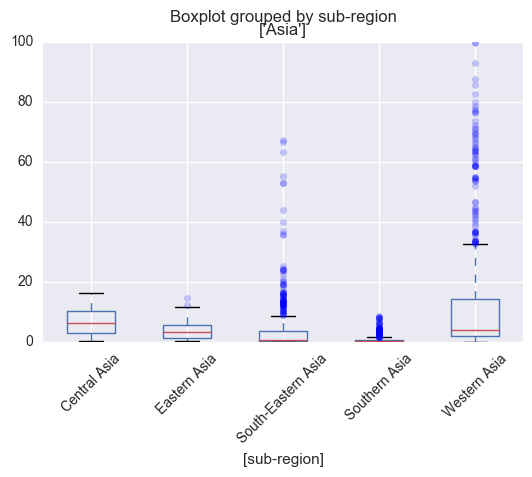

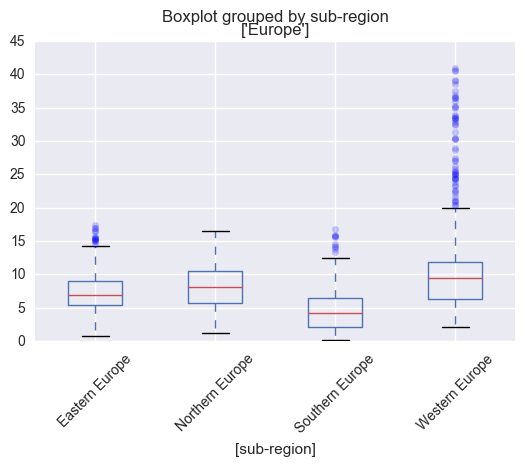

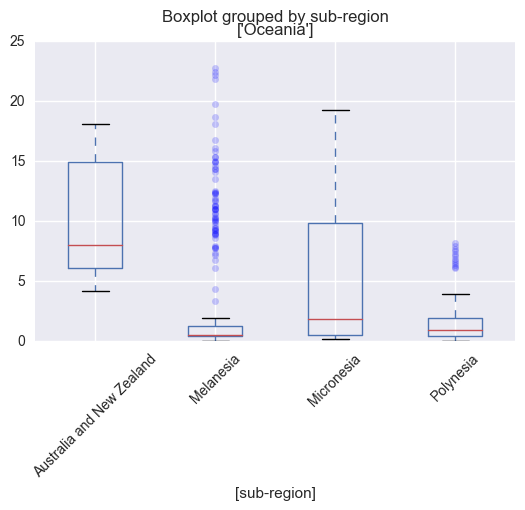

ValueError: need more than 0 values to unpack

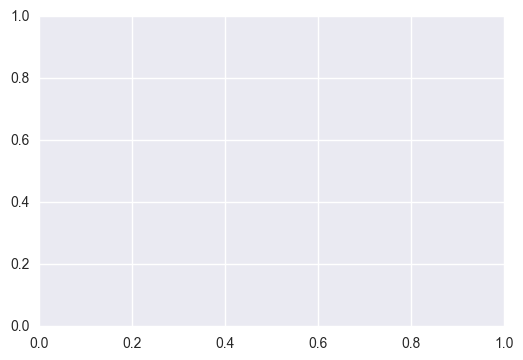

In [163]:
# make boxplot subplots

# split reshaped into smaller regional co2_df's
regions_co2_dfs = [co2_df_box.loc[co2_df_box['region']==region] for region in co2_df_box['region'].unique()]

p = pd.Series(regions_co2_dfs).apply(make_regional_boxplot)
p;

#### Observations
**Extreme outliers usually occur in one sub-region**

The most extreme outliers seem to be in Western Asia, probably from the oil-rich countries.

* In Europe, it's Western Europe.
* In the Americas, it's North America.
* In Oceania, it's Melanesia. Although what's an extreme outlier for Melanasia for the most part is just part of the IQR for Australia & New Zealand.

**Americas & Oceania *seem* to have the most variance amongst sub-regions**

But let's quantify that with some stats.

#### Stats

In [22]:
co2_df.query(q).groupby('region').describe()[val]

count      mean        std      min       25%       50%       75%  \
region                                                                         
Africa    2805.0  0.927940   1.916991  0.00000  0.088430  0.223660  0.701950   
Americas  2408.0  3.914415   5.613982  0.03153  0.778490  1.813780  4.403595   
Asia      2429.0  6.086236  11.814928  0.00000  0.384450  1.868070  5.898780   
Europe    2031.0  7.640857   5.198607  0.23512  4.658550  6.913410  9.898300   
Oceania    814.0  4.029611   5.173526  0.03220  0.469735  1.069965  6.950510   

               max  
region              
Africa    17.55229  
Americas  49.29365  
Asia      99.83136  
Europe    41.03192  
Oceania   22.79775

Let's create some time-series plots so we can see how CO2 emissions have evolved over time.

### What does this look like over time?
#### Pandas plotting

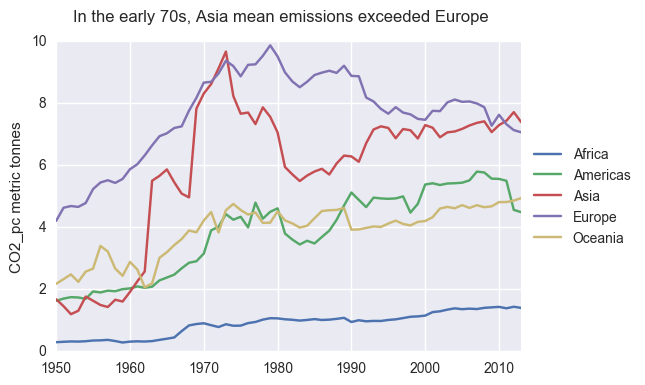

In [170]:
# mean CO2 by year & region
region_year = pd.DataFrame(co2_df.query(q).groupby(['year', 'region']).mean())[val]
region_year.unstack().plot();

plt.ylabel('%s metric tonnes' % val)
plt.xlabel('')
plt.suptitle("In the early 70s, Asia mean emissions exceeded Europe")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

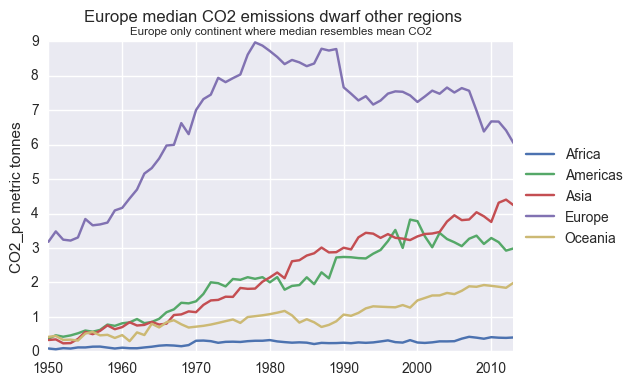

In [173]:
# median CO2 by year & region
region_year = pd.DataFrame(co2_df.query(q).groupby(['year', 'region']).median())[val]
region_year.unstack().plot()

plt.ylabel('%s metric tonnes' % val)
plt.xlabel('')
plt.suptitle("Europe median CO2 emissions dwarf other regions", fontsize='medium', linespacing=10)
plt.title("Europe only continent where median resembles mean CO2", fontsize='x-small')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

#### Observations

*Impact of the 70s fuel crisis*

* The early 1970s saw a massive spike in mean CO2 in Asia. I suspect this is related to the 'OPEC fuel crisis', where rapid increase in oil prices encouraged more production in the middle-eastern.

*Asia, Americas & Oceania averages are heavily influenced by outliers compared to Europe & Africa*

* For Europe & Africa, there is little discernible difference between plotting mean CO2 & median CO2 emissions.
* For the other regions, the outliers we saw in the boxplots create spiky mean CO2 lines.
* The implication: there is a wide variance of CO2 emissions within Asia, Americas, and Oceania. 
* Hypothesis: These variances correlate to economic output of the regions.

*The overall trend for both mean & median CO2 emissions is upwards*

* Increasing fastest for the Americas & Asia, more gradual for Oceania, and slowly for Africa. 

#### Stats

In [174]:
q = 'year >= 1950'
co2_df.query(q).groupby('region').describe()[val].sort_values('mean')

count      mean        std      min       25%       50%       75%  \
region                                                                         
Africa    2805.0  0.927940   1.916991  0.00000  0.088430  0.223660  0.701950   
Americas  2408.0  3.914415   5.613982  0.03153  0.778490  1.813780  4.403595   
Oceania    814.0  4.029611   5.173526  0.03220  0.469735  1.069965  6.950510   
Asia      2429.0  6.086236  11.814928  0.00000  0.384450  1.868070  5.898780   
Europe    2031.0  7.640857   5.198607  0.23512  4.658550  6.913410  9.898300   

               max  
region              
Africa    17.55229  
Americas  49.29365  
Oceania   22.79775  
Asia      99.83136  
Europe    41.03192

In [175]:
#IQR
co2_df.query(q).groupby('region').describe()[val].sort_values('mean').apply(lambda x: x['75%']-x['25%'], axis=1)

region
Africa      0.613520
Americas    3.625105
Oceania     6.480775
Asia        5.514330
Europe      5.239750
dtype: float64

### Zoom in on Europe
Because I live here.

#### Plots

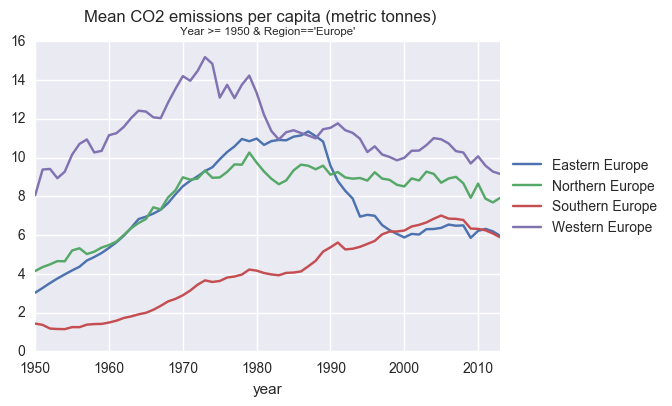

In [176]:
# sub-region averages
q = "year >= 1950 & region=='Europe'"
eur = co2_df.query(q).groupby(['year','region', 'sub-region'])[val].mean().unstack()
eur.reset_index('region').plot()

plt.suptitle('Mean CO2 emissions per capita (metric tonnes)')
plt.title(str.title(q), fontsize='x-small')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

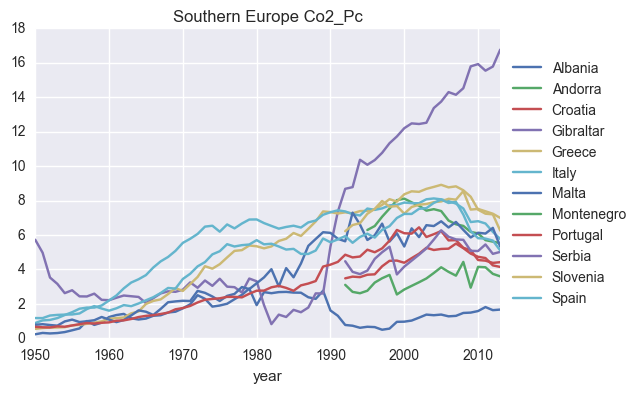

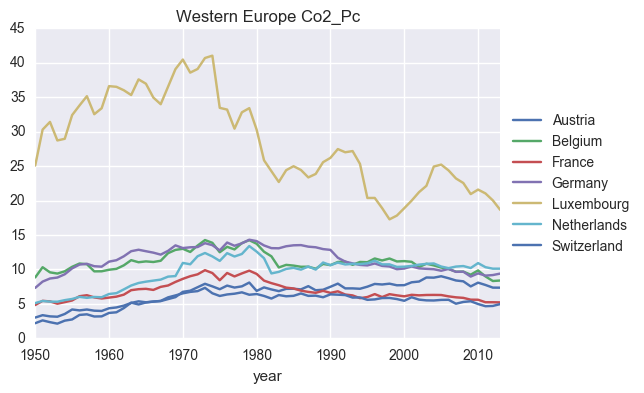

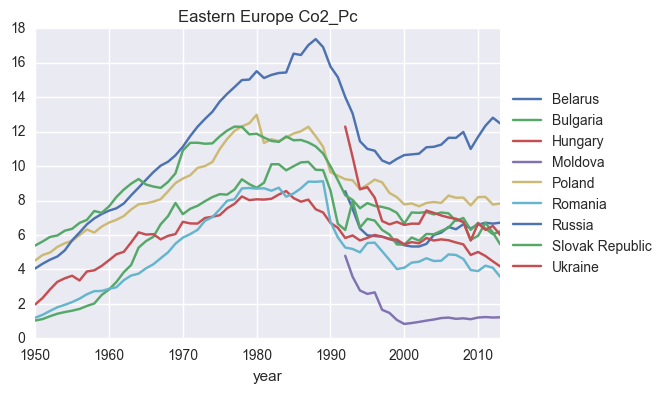

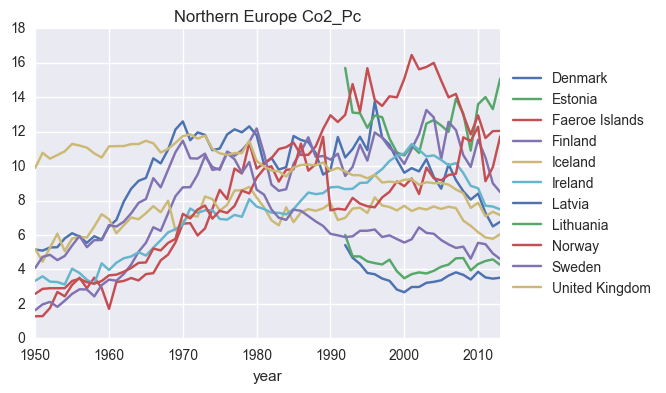

In [179]:
# zoom in on each sub-region
eur = co2_df.query(q)
for subreg in eur['sub-region'].unique():
    regco2_df = eur.loc[eur['sub-region']==subreg].groupby(
                ['sub-region','country', 'year']
                    )[val].mean().unstack(level=1)
    
    regco2_df.reset_index('sub-region').plot()

    plt.title(str.title(subreg + ' %s' % val))
    plt.legend(loc='center left', bbox_to_anchor=(1,0.5));

#### Observations

*What's with Luxembourg & Gibraltar?*

How can tiny countries known for financial services produce so much per capita CO2? 
Similarly, what's going on in the Faroe Islands, another tiny country that's a bit of an outlier for CO2 emissions.

*Lots of noise in the north & south, less so in East & West*

* Even after faceting by sub_region, the N. & S. Europe plots are noisy. 
* E. Europe, made up of entirely of former USSR states, all follow the same pattern and are likely a reflection of the interconnectedness of their economies. 
This might also explain some of the noisiness of N & S Europe, as some ex-Soviet countries are included in these geographic groupings
* Implication: income/GDP should highly correlate with CO2, and is more important than physical location of a country.


With the exception of major outlier Luxembourg, the Western European countries also appear to have parallel p.c. emissions. However, the line representing Luxembourg is just so much higher than the rest, it could just be muting the variations of the other countries.

*Outliers make it hard to compare other countries*

To filter out certain countries, let's create interactive versions of the same plots using plotly.

#### Interactive plots with Plotly + Cufflinks

In [180]:
def plotly_line(co2_df, title):
    fig = co2_df.iplot(asFigure = True,\
                    title = title,\
                    yTitle = str.title("Whatever"),\
                    theme = 'ggplot')
    return fig

def plotly_subreg_timeseries(co2_df, subplot, value):
    for subreg in co2_df[subplot].unique():
        subreg_co2_df = co2_df.loc[co2_df[subplot]==subreg].pivot(index, column, value)
        #print subreg_co2_df.head()
        fig = plotly_line(subreg_co2_df, subreg + ' ' + value)
        py.offline.iplot(fig)

In [30]:
# plot
q = "region=='Europe' & year >= '1950'"
subplot = 'sub-region'
index = 'year'
column = 'country'
val = 'CO2_pc'

plotly_subreg_timeseries(co2_df.query(q), subplot, val)

########## TO INTERACT WITH PLOT.LY PLOT #########
##### Hide a line: single-click corresponding legend item
##### Isolate a line: double-click legend item
##### Bring back all lines: double-click item a 2nd time
##### Select, zoom, pan: hover on upper right of plot to display toolbar

#### More observations

In most of the sub-regions, the smallest countries tend to have highest avg CO2pc emissions:

* W. Europe: Luxembourg (outlier)
* S. Europe: Gibralter (outlier) and Andorra
* N. Europe: Faroe Islands, Estonia

The notable exception: Eastern Europe, where Russia tops the emissions values.

* Western Europe's CO2 trending downwards since the 80s
Does this coincide with slowing economies, or a reduction in energy consumption?

#### Quantify with stats

In [31]:
# descriptive stats
q = "year >= 1950 & region=='Europe'"
co2_df.query(q).groupby('sub-region').describe()[val]

count      mean       std      min       25%       50%  \
sub-region                                                                 
Eastern Europe   1072.0  3.763756  3.848624  0.00000  0.409362  2.199920   
Northern Europe  1278.0  5.057605  4.132986  0.00322  1.279750  3.891360   
Southern Europe   931.0  2.823396  3.026654  0.00027  0.442435  1.377480   
Western Europe   1202.0  6.004038  6.646240  0.01988  1.619065  4.595015   

                      75%       max  
sub-region                           
Eastern Europe   6.425990  17.37377  
Northern Europe  8.923175  16.45167  
Southern Europe  5.125075  16.76391  
Western Europe   8.027683  41.03192

Wow. 

## Where are CO2 emissions changing the most in last 10 years?

In [52]:
# reshape co2_df so region/countries are columns, and years are the rows
# then calculate 10 yr % change entire co2_df

q = "year >= '1950' & region=='Europe'"
co2_df.query(q).loc[co2_df.query(q)['country'] =='Italy'].pct_change(10).head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [33]:
q = "region=='Europe' & year >= '1990'"
co2_change = co2_df.query(q).sort_values(['region', 'sub-region']).set_index(['region','sub-region','country','year']).\
unstack(level=(0,1,2))[val].pct_change()

# verify
co2_change.stack(['region', 'sub-region']).reset_index().set_index('year').iplot(kind='heatmap', colorscale='spectral')

In [34]:
# break down by region & plot heatmaps???

In [35]:
# get max change % for each region

q = 'year == @end_yr'
pd.DataFrame(co2_change.loc[end_yr]).unstack(level=(0)).max(axis=0)

      region
2013  Europe    0.180066
dtype: float64

In [36]:
# what's the minumum change %?
pd.DataFrame(co2_change.loc[end_yr]).unstack(level=0).min(axis=0).sort_values()

      region
2013  Europe   -0.170112
dtype: float64

In [37]:
# what's the min change % for each sub_region?
pd.DataFrame(co2_change.loc[end_yr]).unstack(level=(0,1)).min(axis=0)

      region  sub-region     
2013  Europe  Eastern Europe    -0.127839
              Northern Europe   -0.069917
              Southern Europe   -0.170112
              Western Europe    -0.068807
dtype: float64

# Multi-variate analysis

In [38]:
# expand DF to include all columns
df = pd.read_csv(mypath + 'final_df.csv')
df.head()

country region     sub-region  year   CO2_pc  energy_use_pc  hdi  \
0  Afghanistan   Asia  Southern Asia  1949  0.00182            NaN  NaN   
1  Afghanistan   Asia  Southern Asia  1950  0.01088            NaN  NaN   
2  Afghanistan   Asia  Southern Asia  1951  0.01169            NaN  NaN   
3  Afghanistan   Asia  Southern Asia  1952  0.01155            NaN  NaN   
4  Afghanistan   Asia  Southern Asia  1953  0.01323            NaN  NaN   

   income_pc  motor_vehicles_per_1000  population  roads_paved_%  \
0     1030.0                      NaN         NaN            NaN   
1     1040.0                      NaN   7752118.0            NaN   
2     1060.0                      NaN   7839426.0            NaN   
3     1070.0                      NaN   7934798.0            NaN   
4     1120.0                      NaN   8038312.0            NaN   

   sulfur_emissions_pc_kg  surviving_kids_per_woman  
0                  0.0477                       NaN  
1                  0.0758                      2.89  
2                  0.0932                      2.89  
3                  0.1100                      3.02  
4                  0.1260                      3.02

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17055 entries, 0 to 17054
Data columns (total 13 columns):
country                     17055 non-null object
region                      14970 non-null object
sub-region                  14970 non-null object
year                        17055 non-null int64
CO2_pc                      17055 non-null float64
energy_use_pc               5324 non-null float64
hdi                         3898 non-null float64
income_pc                   14969 non-null float64
motor_vehicles_per_1000     456 non-null float64
population                  12517 non-null float64
roads_paved_%               1977 non-null float64
sulfur_emissions_pc_kg      11230 non-null float64
surviving_kids_per_woman    13919 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.7+ MB


In [40]:
# convert year to str
df['year'] = df['year'].astype('str')

In [41]:
# convert population to int
# to enable bubble plots later on
df['population'] = df['population'].fillna(0).astype(int)

## Who has the biggest CO footprint?
China? The US? Let's see.

In [42]:
# store last year of data set
end_yr = df['year'].max()
q = 'year==@end_yr'

In [43]:
footprint =  df['CO2_pc'] * df['population']
df['CO2_footprint'] = footprint

#df.query(q).loc[df.query(q)['CO2_footprint'].idxmax()]
df[['country','CO2_pc', 'population', 'CO2_footprint']].loc[df.query(q)['CO2_footprint'].idxmax()]

country                China
CO2_pc               7.52178
population        1362514260
CO2_footprint    1.02485e+10
Name: 3156, dtype: object

In [44]:
val = 'CO2_pc'
df.query(q).iplot(kind='bubble', x='population', y=val, size='CO2_footprint', text='country',\
           xTitle='Population (log scale)', yTitle='CO2 per capita', categories='region', logx=True,\
             title='Who had the biggest CO2 footprint in %s?' % end_yr)

## Correlations

In [45]:
df.corr()[val].sort_values(ascending=False)

CO2_pc                      1.000000
energy_use_pc               0.838864
income_pc                   0.712615
motor_vehicles_per_1000     0.618909
hdi                         0.562471
roads_paved_%               0.440285
sulfur_emissions_pc_kg      0.278357
CO2_footprint               0.164357
population                  0.008108
surviving_kids_per_woman   -0.146035
Name: CO2_pc, dtype: float64

In [46]:
q = 'year >= 1950'
df.query(q).corr()[val].sort_values(ascending=False)

CO2_pc                      1.000000
energy_use_pc               0.838864
income_pc                   0.712615
motor_vehicles_per_1000     0.618909
hdi                         0.562471
roads_paved_%               0.440285
sulfur_emissions_pc_kg      0.278357
CO2_footprint               0.164357
population                  0.008108
surviving_kids_per_woman   -0.146035
Name: CO2_pc, dtype: float64

In [47]:
q = 'year >= 1990'
df.query(q).corr()[val].sort_values(ascending=False)

CO2_pc                      1.000000
energy_use_pc               0.838864
income_pc                   0.712615
motor_vehicles_per_1000     0.618909
hdi                         0.562471
roads_paved_%               0.440285
sulfur_emissions_pc_kg      0.278357
CO2_footprint               0.164357
population                  0.008108
surviving_kids_per_woman   -0.146035
Name: CO2_pc, dtype: float64

ValueError: zero-size array to reduction operation minimum which has no identity

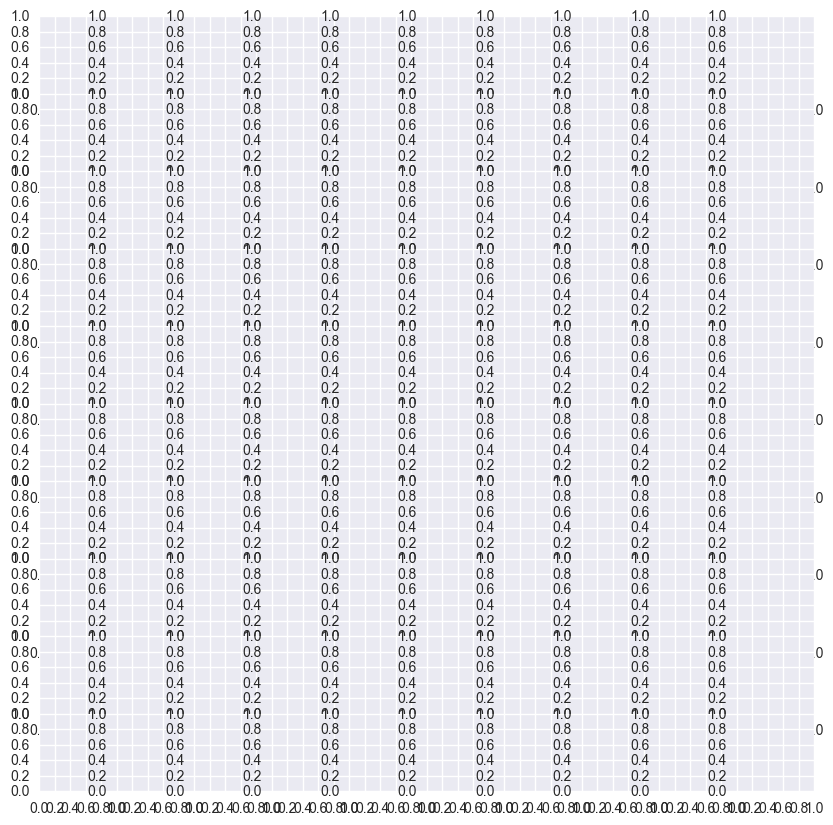

In [57]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.query(q), figsize=(10,10));

In [49]:
# by region
df.groupby('region').corr()[val].unstack().T\
.drop('year')

ValueError: labels ['year'] not contained in axis

In [ ]:
# how many missing regions?
len(df['country'][df['region'].isnull()].unique())

### Observations

#### Energy, then Income have highest correlation with CO2 p.c. emissions

Motor vehicle ownership & HDI also show strong correlations. 
Kids surviving to 35 have a moderate negative correlation overall, and a strong negative correlation for Oceania.

Another exception for Oceania is sulfur emissions: it has the highest correlation with CO2 emissions for Oceania, whereas it is small everwhere else.

But to what extent are HDI scores, vehicle ownership, and surviving kids (i.e. family size) just proxies for income? 

## Is there a lot of variation in correlations within regions?

In [ ]:
# further break down CO2 correlation matrix by sub_region
co2_corr = df.query(q).groupby(['region', 'sub-region']).corr()[val]
co2_corr = co2_corr.unstack(level=(0,1))

co2_corr

### Observations
In North America, Family Size (Surviving Kids) has a positive correlation
There are fascinating descrepancies within the regions as well.

For example, North America is the only sub_region in the world where the more adult children in a family, the higher the per capita CO2 emissions.

Another unique exception in N. America: Energy has an exceptionally low correlation. But the correlation with motor vehicle ownership & % roads paved is the highest in the Americas.

## Are the regional breakdowns too arbitrary?

In some regions, there are 'gorillas' that could skew the numbers, such as the US in the Americas, or Australia for Oceania.

Looking at the bubble plots, in each region there seems to be an invisible line dividing a few high-income/energy/CO2 emitting countries from the mass of countries clustered in the bottom left.

In other words, do the 'have' countries emit CO2 for different reasons than the have-not countries, regardless of where they are located?

In [ ]:
df.info()

In [ ]:
plot_cols = [col for col in df.columns[5:]]
plot_cols

In [ ]:
df['year'].loc[df[col].last_valid_index()]

In [ ]:
for col in plot_cols:
    last_valid = df['year'].loc[df[col].last_valid_index()]
    q = "year == @last_valid"
    y = 'CO2_pc'
    x = col
    size= 'CO2_footprint'
    cat_col = 'hdi'
    plot_bubble(df.query(q), x)
    #plot_bubble_with_cuts(df.query(q), cat_col)

In [ ]:
# compare income to surviving kids by HDI level
# TODO: update plot_bubble_with_cuts() to use qcuts instead?

q = "year == '2010'" # no 'Surviving' data after this year
x = 'income_pc'
y = 'surviving_kids_per_woman'
size = 'CO2_footprint'
cat_col = 'hdi'

plot_bubble_with_cuts(df.query(q), cat_col)

In [ ]:
# compare on income levels
(q) = 'year == @end_yr'
x = 'income_pc'
y = 'CO2_pc'
size = 'CO2_footprint'
cat_col = 'hdi'

plot_bubble_with_cuts(df.(q)((q)), cat_col)

In [ ]:
# look at the distributions by HDI level

# reshape so region, sub_region & CO2 are columns
#df_box = df.sort_values('hdi_level').set_index(['hdi_level', 'country'])['CO2']
#df_box.reset_index('country').boxplot(by='hdi_level', showfliers=False);

In [ ]:
# Create x, where x the 'scores' column's values as floats
x = df[[val]].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

df_normalized = pd.DataFrame(x_scaled)
df_normalized.head()

In [ ]:
df['region'].unique()

In [ ]:
q = "year=='2007'"
valcols = df.columns[4:-1]

for region in df['region'].unique():
    
    hm_df = df.query(q).loc[df['region']==region].set_index('country')[valcols]
    normalized_df=(hm_df-hm_df.min())/(hm_df.max()-hm_df.min())
    normalized_df.sort_values(val).iplot(kind='heatmap', colorscale='spectral', title=str.upper(region))

# Conclusions

## CO2 analysis

* Not surprisingly, per capita CO2 emissions are usually highly correlated with per capita income & energy consumption, and to a lesser extent, motor vehicle ownership & HDI score.

* There were intriguing outliers in Europe, all tiny countries: Luxembourg, Faroe Islands, Gibraltar & Estonia. Several Carribean countries had very high CO2 p.c. emissions. Some avenues worth exploring:
    * Is this because their tiny size forces them to import most goods? 
    * Many of these countries are quite wealthy. More flights taken? Higher yacht ownership? 


## Multi-variate analysis
* For multi-variate analysis, regional (continents) comparisions almost useless: too much noise within regions due to extreme outliers and unequal distribution of (wealthy) countries within sub-regions. Prime examples:
    * Americas: Northern Americas,  
    * Oceania:  Australia & New Zealand
    * Asia: Western Asia, which includes most of the OPEC countries
* Instead, segmenting by HDI level revealed interesting patterns in scatterplots of CO2 vs Surviving Kids - negatively correlated except for High or Very High HDI groups.


